## 4. Otros modelos estadísticos y de Machine Learning. Visión general

### Modelización estadística

Ejemplo de modelización estadística para introducir el ejemplo de corte óptimo.

Usamos el [dataset de icebergs de Kaggle](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge). Según las normas, está permitido ser usado para propósitos educativos.

El dataset contiene 75x75 lecturas de un sensor  y el objetivo del reto de Kaggle es determinar si la lectura corresponde a un iceberg o de un barco. 

Para problemas complejos como éste, suele necesitarse más de un modelo, por ejemplo, un primer modelo que intenta descartar la muestra basada en algún método sencillo, y después otro modelo más costoso que actúa si el método sencillo no puede descartarlo. 

Vamos a ver un ejemplo de modelo estadístico para filtrado. 

A. Cargar el dataset. 

In [1]:
import json

iceberg_file = json.load(open('../train.json'))

B. Explorar para extraer algún atributo informativo

In [2]:
import numpy as np

sband1 = np.array([np.max(x['band_1']) for x in iceberg_file])
sband2 = np.array([np.max(x['band_2']) for x in iceberg_file])
#angles = np.asarray(np.array([x['inc_angle'] for x in iceberg_file]), 'float')
y = np.array([x['is_iceberg'] for x in iceberg_file])

In [3]:
np.mean(sband1[y==0]), np.mean(sband1[y==1]) 

(4.674684594594595, -1.4874424422310757)

In [4]:
np.mean(sband2[y==0]), np.mean(sband2[y==1]) 

(-6.74837080493537, -13.80762496945551)

C. Visualizar

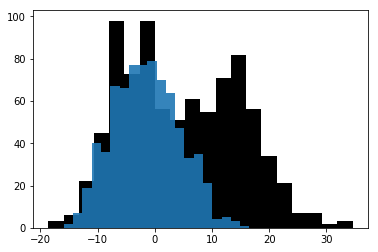

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(sband1[y==0], 20, color='black')

plt.hist(sband1[y==1], 20, alpha=0.9)
plt.show()

Vemos cómo es posible filtrar fácilmente muchas muestras que serían barco. Por ejemplo, para un valor del atributo superior a 10, prácticamente todo son barcos. 

Midamos, para cada valor $x$ del atributo , cuál sería la proporción de barcos por encima de $x$: 

Text(0,0.5,'Probability of ship')

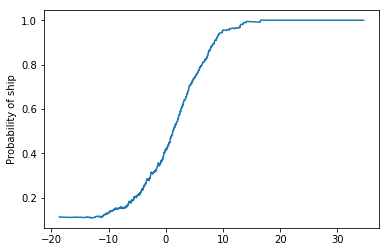

In [7]:
n0 = np.empty_like(sband1)
n1 = np.empty_like(sband2)

values_ship    = sband1[y==0]
values_iceberg = sband1[y==1]

nships   = np.sum(y==0)
niceberg = np.sum(y==1) 

values_sorted = np.sort(sband1)

for i in range(values_sorted.shape[0]):
    n0[i] = np.sum(values_ship    > values_sorted[i])
    n1[i] = np.sum(values_iceberg > values_sorted[i])
    
plt.plot(values_sorted, 1-(n1/(n0+.001)))
plt.ylabel('Probability of ship')

Vemos que 

* A partir de un cierto valor, el 100% de las muestras son de barco. (Ojo! Puede ser que hayamos visto demasiado pocos icebergs en el training set. Recordemos lo que dijimos que los modelos mejoran con más datos). 

* Tenemos una palanca que nos permite tomar decisiones. Por ejemplo: ¿cuál es el valor umbral que hay que fijar si podemos admitir equivocarnos en un 5% de los icebergs?

* La selección del valor umbral requiere realizar un trade-off entre coste y calidad. 

Los icebergs que ignoraríamos por filtrar por cierto un valor umbral, se llaman "falsos negativos" (explicar en clase).

**Recordatorio**. ¿Cuál es el modelo aquí? (Pista: Recordemos que el modelo es toda la información necesaria para tomar la decisión). 

* Ejercicio: Bajar el test y comprobar. 

## Paréntesis: Modelos dentro del proceso de Data Science

En muy pequeña escala, esto es una ilustración simplificada del proceso de data science. Ya que hemos hecho los siguientes pasos: 


* Leer los datos de una fuente (json)
* Ponerlos en el formato de nuestra aplicación (arrays de numpy). 
* Convertir los datos en variables (en este caso ha sido el max de la señal 1). Nota: Hemos explorado varias alternativas. También nos hemos dejado alternativas sin explorar al encontrar una solución "good enough". 
* Se modela el atributo con un "lookup" de probabilidades. 

Y esto sólo es para descartar una parte! Luego para resolver el problema completo, habría que diseñar la segunda fase del proceso. 

La modelización en data science es un proceso no lineal, donde muchas veces se llegan a resultados en los que hay que ir atrás y cambiar algo en el proceso. Actúa de manera similar al método científico. Este [curso de Udacity](https://eu.udacity.com/course/model-building-and-validation--ud919) ilustra con ejemplos el proceso de data science. 

# Caso de uso de Machine Learning

Vamos a ver un caso de uso de machine learning sencillo también, para provcar que salgan los conceptos que se necesitarán en las siguientes clases. 

De momento hablaremos de 

* Métodos no supervisados / supervisados (dependiendo de si se modelan muestras $x$ o pares de muestra-etiqueta ($x$, $y$).
* Representación vectorial de entrada (cuando $x=[x_1, \ldots, x_D]$, que es el caso más habitual). 
* Clasificación vs. regresión (dependiendo de si $y$ es un valor categórico o contínuo).
* Clasificación binaria vs. multiclase (dependiendo de si el número de categorías de $y$ es 2 o mayor). 
* Clasificadores discriminativos (cuando lo que intentan es buscar superficies de separación entre las clases). 
* Clasificadores estadísticos (cuando modelizan la probablidad de que una muestra pertenezca a una clase). 
* Clasificadores basados en árboles de reglas (cuando modelizan la clasificación como una secuencia óptima de reglas). 


Todo esto se ve en clases siguientes en mucho detalle. De momento, un ejemplo de clasificación binaria en sklearn para empezar a tocar con las manos alguna de estas cosas. 

A. Construimos representación

In [92]:
# Construimos representación
x_train = np.array([np.array(x['band_1']) for x in iceberg_file])

Visualizamos una muestra

Text(0.5,1,'0')

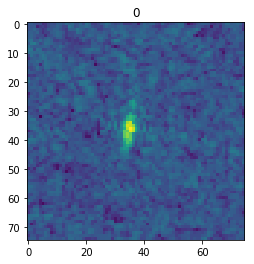

In [131]:
plt.imshow(x_train[0].reshape(75,75))
plt.title(y[0])

Ajustamos un clasificador de caja negra. (Por ejemplo: regresión logística, que es un clasificador estadístico). 

In [148]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train[:1000], y[:1000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Tasa de acierto del clasificador en el conjunto de training

In [149]:
np.mean(lr.predict(x_train[:1000]) == y[:1000])

1.0

Tasa de acierto en el conjunto de test. 

In [150]:
np.mean(lr.predict(x_train[1000:]) == y[1000:])

0.6324503311258278

Este fenómeno está relacionado con el overfitting que hemos mencionado antes.

Ahora un ejemplo de clasificación de texto. Mejoramos un poco lo que hicimos antes, ya que en lugar de contar palabras vamos a ver (muy rápido) cómo montar una representación vectorial del documento y aplicarle un clasificador. 

La mejor representación siempre depende del problema. Una representación común para texto es lo que se llama one-hot-encoding, que explicaremos en clase con este ejemplo siguiente. Iremos copiando estos bloques en el notebook de clasificación de lenguaje. 


In [9]:
def representation(sentence, dict_es, dict_en):
        
    n_es = w_es.shape[0]
    n_en = w_en.shape[0]
    
    x = np.empty(shape=(n_en + n_es,))
    
    words = sentence.split(" ")
        
    for i in range(n_es):
        x[i] = w_es[i] in words
        
    for i in range(n_en):
        x[i+n_es] = w_en[i] in words
        
    
    return x

In [ ]:
representation("esta es una frase en el idioa español", w_es, w_en)

In [194]:
def collect_representation(lang):

    # lang is "es" or "en"
    
    all_repr = []
    
    PREFIX = "data/Cross-Language-Dataset/dataset/documents/Europarl/"
    words = dict()
    
    # Collect words into dict
    filelist = "data/lang/training-" + lang + ".txt"
    with open(filelist) as f:
        
        lines = f.readlines()
        for l in lines:
            realfile = PREFIX + lang + "/" + l.replace("\n", "")
            str_ = file2str(realfile)
            all_repr.append(representation(str_, w_es, w_en))
            
    return np.array(all_repr)

In [195]:
x_es = collect_representation("es")
x_en = collect_representation("en")

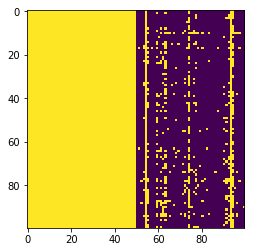

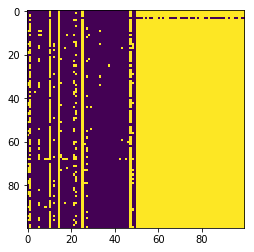

In [199]:
plt.imshow(x_es)
plt.show()
plt.imshow(x_en)
plt.show()

Ver el patrón!!

In [217]:
 lr = LogisticRegression()

x_train = np.vstack((x_es[:50], x_en[:50]))
y_train = np.array(50*[0] +50*[1])

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [219]:
lr.predict(x_es[50:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [220]:
lr.predict(x_en[50:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [231]:
lr.predict(representation("Decide a ver", w_es, w_en)[None,:])

array([1])

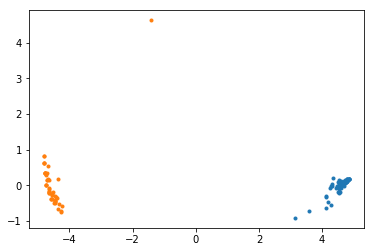

In [237]:
from sklearn.decomposition.pca import PCA

pca = PCA(n_components=2)

projected = pca.fit_transform(x_train)

plt.plot(projected[:50,0], projected[:50,1], '.')
plt.plot(projected[50:,0], projected[50:,1], '.')

In [239]:
np.where(projected[:,1] > 4)

(array([53]),)